In [15]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd

In [24]:
y=pd.read_excel('ex8_movies.xlsx',sheet_name='y',header=None)

In [25]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,5,4,0,0,4,4,0,0,0,4,...,2,3,4,0,4,0,0,5,0,0
1,3,0,0,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,5
2,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3,0,0,0,0,0,5,0,0,4,...,5,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
r=pd.read_excel('ex8_movies.xlsx',sheet_name='R',header=None)
r.head()

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,True,True,False,False,True,True,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
1,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
for col in range(len(r.columns)):
    r[col]=r[col].replace({True:1,False:0})
r.head()    

C:\Users\hp\AppData\Local\Temp\ipykernel_253800\4035822449.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  r[col]=r[col].replace({True:1,False:0})


,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1,1,0,0,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y.shape

(1682, 943)

In [29]:
r.shape

(1682, 943)

In [30]:
theta=pd.read_excel('movie_params.xlsx',sheet_name='theta',header=None)
theta.shape

(943, 10)

In [31]:
X=pd.read_excel('movie_params.xlsx',sheet_name='X',header=None)
X.shape

(1682, 10)

In [34]:
def costfunction(X,y,r,theta,lamda):
    
     predictions= np.dot(X,theta.T)
     err=(predictions-y)*r


     J=0.5*np.sum(err**2)
     reg_x=lamda/2 * np.sum(np.sum(X**2))
     reg_theta=lamda/2 * np.sum(np.sum(theta**2))
    
     J_total=J+reg_x+reg_theta
    
     return J_total 

In [108]:
def gradientDescent(X, y, r, theta, lamda, lr, n_iters):
    J_hist = []
    for _ in range(n_iters):
        # Compute error
        error = (np.dot(X, theta.T) - y) * r

        # Compute gradients
        X_grad = np.dot(error, theta) + lamda * X
        theta_grad = np.dot(error.T, X) + lamda * theta

        # Update parameters
        X -= lr * X_grad
        theta -= lr * theta_grad

        # Record cost
        cost = costfunction(X, y, r, theta, lamda)
        J_hist.append(cost)

    return X,theta,J_hist

In [143]:
def normalizeRatings(y, r):
    m, n = y.shape
    y_mean = np.zeros(m)          
    y_norm = np.zeros((m,n))

    for i in range(m):
        idx = r[i, :] == 1       
        if np.any(idx):
            y_mean[i] = np.mean(y[i, idx])       
            y_norm[i, idx] = y[i, idx] - y_mean[i]

    return y_mean, y_norm


In [144]:
r.shape 

(1682, 943)

In [145]:
my_ratings = np.zeros((1682,1))

In [146]:
my_ratings[5] = 5 
my_ratings[50] = 1
my_ratings[9] = 5
my_ratings[27]= 4
my_ratings[58] = 3
my_ratings[88]= 2
my_ratings[123]= 4
my_ratings[165] = 1
my_ratings[187]= 3
my_ratings[196] = 2
my_ratings[228]= 4
my_ratings[258] = 5 
my_ratings[343] = 4
my_ratings[478] = 1
my_ratings[511]= 4
my_ratings[690] = 5
my_ratings[722]= 1
my_ratings[789]= 3
my_ratings[832] = 2
my_ratings[1029]= 4
my_ratings[1190] = 2
my_ratings[1245]= 5

In [147]:
y1 = np.hstack((my_ratings,y))

In [148]:
rated = np.zeros((1682,1))

for i in range(len(r)):
    if my_ratings[i] != 0:
        rated[i]=1 

In [149]:
r1 = np.hstack((rated,r))

In [150]:
X.shape

(1682, 10)

In [151]:
y_mean,ynorm = normalizeRatings(y1,r1)

In [152]:
ynorm

array([[ 0.        ,  1.12168142,  0.12168142, ...,  1.12168142,
         0.        ,  0.        ],
       [ 0.        , -0.20610687,  0.        , ...,  0.        ,
         0.        ,  1.79389313],
       [ 0.        ,  0.96666667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [153]:
ynorm.shape

(1682, 944)

In [154]:
new_theta = np.random.randn(1, num_features)
theta=np.vstack((new_theta,theta))

In [155]:
theta.shape

(945, 10)

In [156]:
num_users = y1.shape[1]
num_movies = y1.shape[0]
num_features = 10

In [157]:
X.shape

(1682, 10)

In [158]:
theta.T.shape

(10, 945)

In [159]:
r.shape

(1682, 943)

In [160]:
y.shape

(1682, 943)

In [172]:
x_up,theta_up,J_hist = gradientDescent(X, ynorm, r1, theta, 10,0.001,500)

ValueError: operands could not be broadcast together with shapes (1682,945) (1682,944) 

In [162]:
J_hist

[np.float64(39061.465243281265),
 np.float64(39061.40970067139),
 np.float64(39061.35426647572),
 np.float64(39061.298940409164),
 np.float64(39061.243722187544),
 np.float64(39061.18861152761),
 np.float64(39061.133608146956),
 np.float64(39061.0787117642),
 np.float64(39061.02392209875),
 np.float64(39060.969238870945),
 np.float64(39060.91466180205),
 np.float64(39060.86019061419),
 np.float64(39060.805825030315),
 np.float64(39060.75156477443),
 np.float64(39060.69740957113),
 np.float64(39060.6433591462),
 np.float64(39060.589413226066),
 np.float64(39060.53557153809),
 np.float64(39060.48183381055),
 np.float64(39060.4281997725),
 np.float64(39060.374669153854),
 np.float64(39060.32124168538),
 np.float64(39060.26791709877),
 np.float64(39060.21469512646),
 np.float64(39060.16157550175),
 np.float64(39060.10855795874),
 np.float64(39060.05564223246),
 np.float64(39060.00282805864),
 np.float64(39059.95011517397),
 np.float64(39059.89750331582),
 np.float64(39059.84499222249),
 np

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\hp\AppData\Local\Temp\ipykernel_253800\1099839499.py:5: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

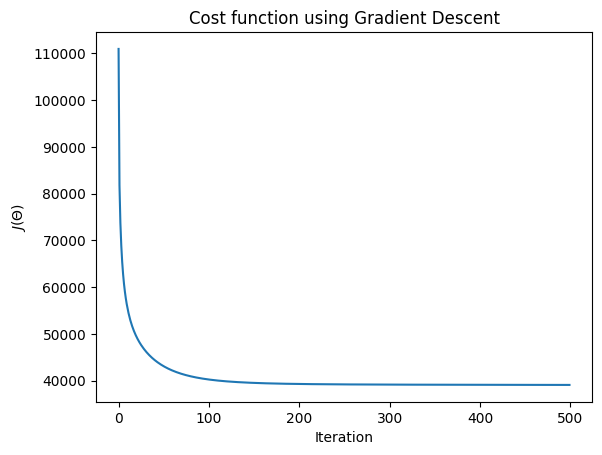

In [105]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [114]:
p= np.dot(x_up,theta_up.T)

In [115]:
p

array([[-3.74235208e-02, -2.07333152e-03,  1.39112460e-01, ...,
         2.56863443e-01,  7.01561894e-01, -3.99658530e-01],
       [ 2.31898269e-02, -1.79539574e-02,  1.09306156e-01, ...,
         1.43842078e-01,  4.71172207e-01,  2.18084454e-04],
       [ 1.72522137e-01,  1.81948631e-01, -1.03584272e-02, ...,
         2.12657906e-01,  1.74833670e-01,  3.05785563e-01],
       ...,
       [-1.69431727e-08,  5.93335568e-08,  2.34396109e-08, ...,
         2.29708251e-08,  3.53119728e-08, -4.33093166e-08],
       [-9.60335718e-08,  8.25744487e-08,  8.36604769e-08, ...,
         1.08408213e-08,  8.07342077e-08, -4.81747593e-08],
       [-8.68915902e-08,  6.99102477e-08,  8.11806540e-08, ...,
         1.27121875e-08,  6.26123566e-08, -8.42998406e-08]])

In [164]:
my_predictions = p[:, 0] + y_mean[0]

In [165]:
my_predictions = pd.DataFrame(my_predictions)

In [169]:
movies = open('movie_ids.txt', 'r').read().split("\n")[:-1]

In [170]:
df = pd.DataFrame(np.hstack((my_predictions,np.array(movies)[:,np.newaxis])))

In [171]:
df.sort_values(by=[0],ascending=False,inplace=True)
df.head(10)

,0,1
258,4.848096133345659,259 George of the Jungle (1997)
293,4.659998805171998,294 Liar Liar (1997)
239,4.511268283242672,240 Beavis and Butt-head Do America (1996)
681,4.480237312230768,682 I Know What You Did Last Summer (1997)
323,4.474219271999913,324 Lost Highway (1997)
686,4.455956025754731,687 McHale's Navy (1997)
287,4.439266972349113,288 Scream (1996)
324,4.426067937833715,325 Crash (1996)
677,4.418612838343396,678 Volcano (1997)
270,4.415981039214775,271 Starship Troopers (1997)
